In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [3]:
!pip install tweet-preprocessor
import preprocessor as p
def preprocess_tweet(row):
    text = row['Tweet']
    text = p.clean(text)
    return text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df['Tweet'] = df.apply(preprocess_tweet, axis=1)
df.head()

,Tweet,Label
0,A little throwback with my favourite person Wa...,0
1,"glam on yesterday for makeup using in ,",7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO Walt Disney Magic Kingdom,0
4,Who never... A Galaxy Far Far Away,2


In [5]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
df.head()

<ipython-input-5-ab46dfe31e12>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,Tweet,Label
0,a little throwback with my favourite person wa...,0
1,glam on yesterday for makeup using in,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [6]:
 df.drop_duplicates(inplace=True)
print('after drop duplicates', df.shape)

after drop duplicates (49728, 2)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')
X = vectorizer.fit_transform(df.Tweet)

In [8]:
y = df["Label"].values

In [9]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101)
X,y = os.fit_resample(X, y)

In [10]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [11]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (181373, 33449)
Training y Dim  (181373,)


In [12]:
from sklearn.svm import SVC
clf = SVC()
#clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

Text(69.0, 0.5, 'Truth')

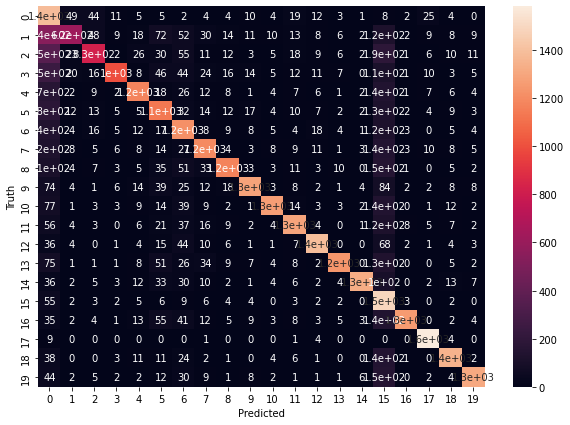

In [14]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.37      0.87      0.52      1600
           1       0.81      0.39      0.53      1600
           2       0.82      0.52      0.63      1600
           3       0.94      0.62      0.75      1600
           4       0.87      0.73      0.80      1600
           5       0.70      0.71      0.70      1600
           6       0.67      0.76      0.71      1601
           7       0.82      0.75      0.78      1600
           8       0.90      0.73      0.80      1600
           9       0.93      0.80      0.86      1601
          10       0.95      0.79      0.86      1600
          11       0.89      0.81      0.85      1601
          12       0.93      0.87      0.90      1600
          13       0.96      0.77      0.85      1601
          14       0.98      0.83      0.90      1600
          15       0.41      0.93      0.57      1601
          16       0.98      0.79      0.87      1600
          17       0.95    